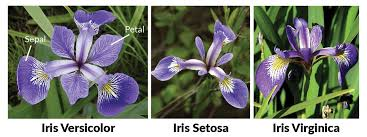

**Iris Classification**

The Iris classification model is a classic machine learning example used for training and evaluating classification algorithms. It involves predicting the species of iris flowers based on several features. Here's a brief explanation of the Iris classification model:

Dataset: The Iris dataset consists of 150 iris flowers, each belonging to one of three species: Setosa, Versicolor, or Virginica. For each flower, four features are measured:

1.**Sepal Length**: The length of the iris flower's sepal (the green leaf-like structures at the base of the flower).

2.**Sepal Width**: The width of the iris flower's sepal.

3.**Petal Length**: The length of the iris flower's petal (the colored part of the flower).

4.**Petal Width**: The width of the iris flower's petal.

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('IRIS.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
pip install scikit-learn==1.3.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Analysis

<Axes: >

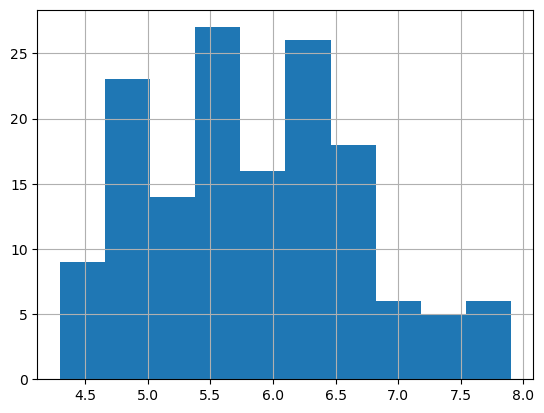

In [ ]:
df['sepal_length'].hist()

<Axes: >

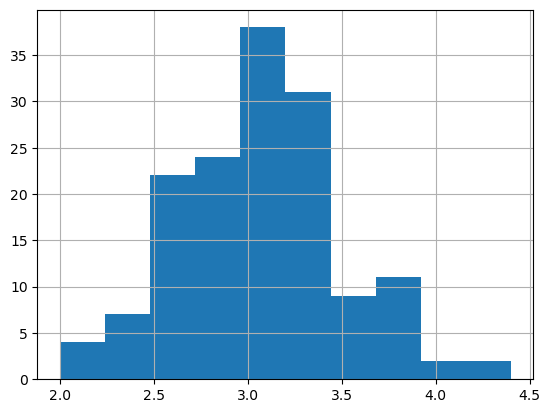

In [ ]:
df['sepal_width'].hist()

<Axes: >

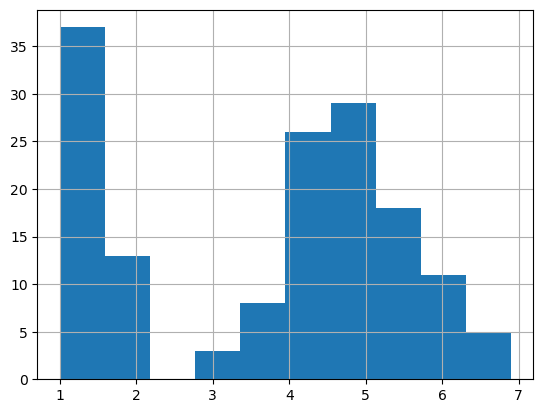

In [ ]:
df['petal_length'].hist()

<Axes: >

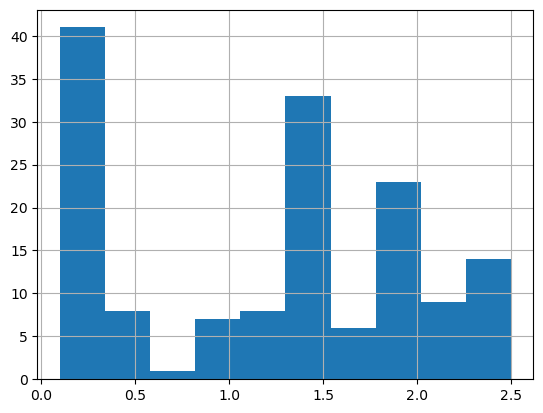

In [ ]:
df['petal_width'].hist()

In [ ]:
#creating class labels and colors
color = ["purple", "green", "blue"]
Species = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']


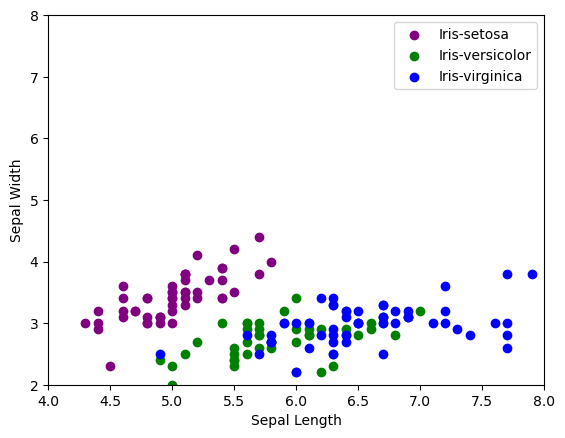

In [ ]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=color[i], label= Species[i])
#     plt.scatter(df.sepal_length, df.sepal_width, c = color[i], label=Species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(4,8)
    plt.ylim(2,8)
    plt.legend()


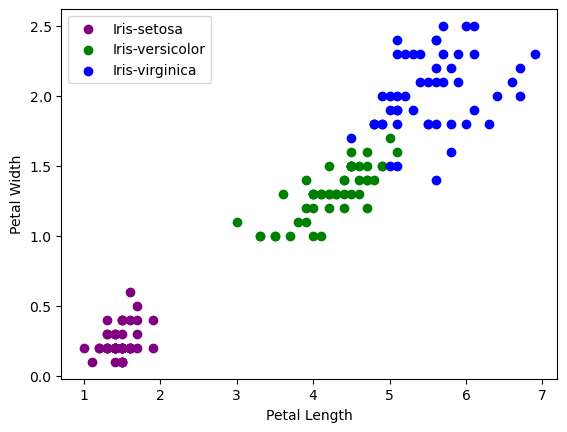

In [ ]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=color[i], label= Species[i])
#     plt.scatter(df.petal_length, df.petal_width, c=color[i], label= Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()


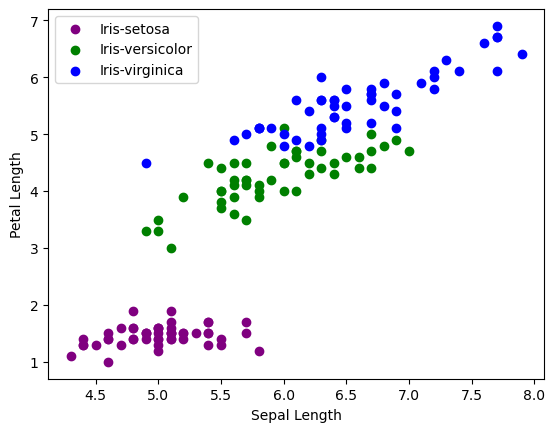

In [ ]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=color[i], label= Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

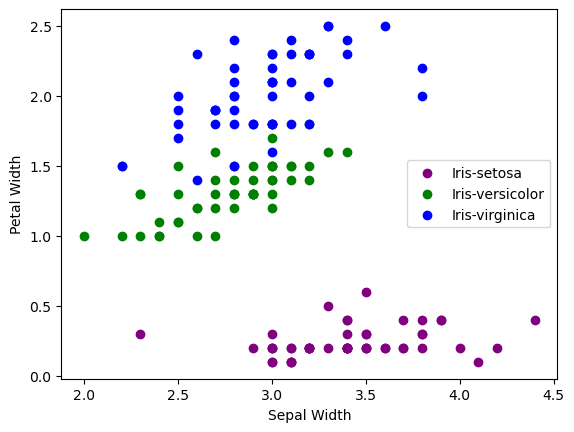

In [ ]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=color[i], label= Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation Matrix

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

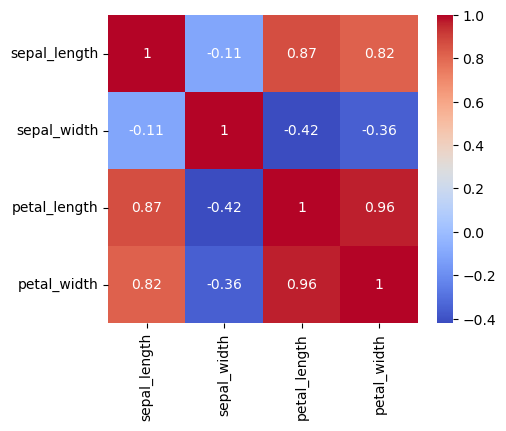

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# input
x = df.drop(columns = ['species'])
#  output
y = df['species']
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("LogisticRegression Accuracy:", accuracy)

# Generating Classification report using classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report (Logistic Regression):")
print(class_report)

LogisticRegression Accuracy: 0.9111111111111111
Classification Report (Logistic Regression):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.81      0.89        21

       accuracy                           0.91        45
      macro avg       0.92      0.94      0.92        45
   weighted avg       0.93      0.91      0.91        45



In [ ]:
print("LogisticRegression Accuarcy: ", model.score(x_test, y_test) * 100)

LogisticRegression Accuarcy:  91.11111111111111


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("KNeighborsClassifier Accuracy:", accuracy)

# Generating Classification report using classification_report

class_report = classification_report(y_test, y_pred)
print("Classifiaction Report (KNN):")
print(class_report)

KNeighborsClassifier Accuracy: 0.9333333333333333
Classifiaction Report (KNN):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.95      0.90      0.93        21

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



In [ ]:
print("KNeighborsClassifier Accuracy: ", model.score(x_test, y_test) * 100)

KNeighborsClassifier Accuracy:  93.33333333333333


In [ ]:
import pickle
filename = 'saved_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print("Error saving the model: {e}")


Model saved successfully.


In [ ]:
load_model = pickle.load(open(filename, 'rb'))

**PREDICTION**

In [ ]:
load_model.predict([[4, 8, 6, 3]])

array(['Iris-virginica'], dtype=object)

In [ ]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
147,6.5,3.0,5.2,2.0
80,5.5,2.4,3.8,1.1
141,6.9,3.1,5.1,2.3
37,4.9,3.1,1.5,0.1
25,5.0,3.0,1.6,0.2


In [ ]:
load_model.predict([[4, 3, 1, 5]])


array(['Iris-setosa'], dtype=object)

**DEPLOYMENT**

In [ ]:
import joblib

# Save the updated model using joblib
filename_joblib = 'saved_model1.joblib'
try:
    joblib.dump(model, filename_joblib)
    print("Model saved successfully using joblib.")
except Exception as e:
    print(f"Error saving the model using joblib: {e}")

Model saved successfully using joblib.


In [ ]:
import joblib

# Load the updated model using joblib
filename_joblib = 'saved_model1.joblib'
loaded_model = joblib.load(filename_joblib)

# Now you can use the "loaded_model" for inference or any other operations

In [ ]:
load_model.predict([[5,3,1,0.2]])

array(['Iris-setosa'], dtype=object)

In [ ]:
import pickle

# Assuming 'model' is your scikit-learn model
with open('saved_model1.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

# Load the model
with open('saved_model1.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
import joblib

load_model = 'scaler.save'

In [ ]:
joblib.dump(model, scaler)

['scaler.save']

In [ ]:
with open('scaler.save', 'rb') as file:
    model = pickle.load(file)

"Thank you for your interest in continuing to explore this topic. Your curiosity and dedication to learning are truly appreciated. Let's dive deeper and discover more together!"



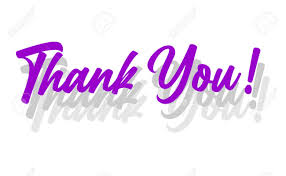